In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2003 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_03(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata03 = pd.read_csv("perlist03_s.csv")
    f = perdata03['f']
    per = perdata03['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata03)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m03=Minuit(twi_minus_loglikelihood_03,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,3), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m03.migrad()

pprint(m03.fval)

FCN = 8160.828348300168 
 TOTAL NCALL = 426 
 NCALLS = 426 
 
 
 EDM = 5.751190318454365e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.664509,0.139284,,,-3,3,No
1,log_f_b,-2.69713,0.326534,,,-5,-2,No
2,alpha_H,1.85422,0.514616,,,1,5,No
3,log_poisson,0.969695,0.149789,,,-3,3,No


8160.828348300168


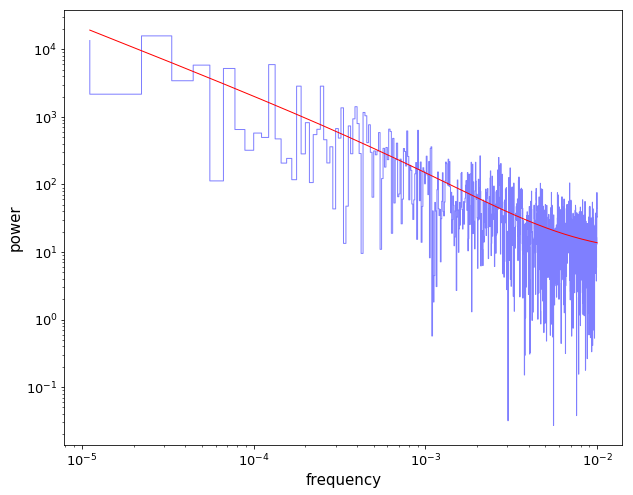

In [4]:
perdata03 = pd.read_csv("perlist03_s.csv")
f_03 = perdata03['f']
per_03 = perdata03['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m03.values[0],m03.values[1],m03.values[2],m03.values[3]

model_03 = []
f_length_03 = len(f_03)
for i in range(f_length_03):
    model_03.append(((f_03[i]**(-alpha_L))/(1+(f_03[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_03, per_03, color="b", alpha=0.5, linewidth=1)
plt.plot(f_03, model_03, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2003 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_03(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata03 = pd.read_csv("perlist03_s.csv")
    f = perdata03['f']
    per = perdata03['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata03)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n03=Minuit(twi_minus_loglikelihood_nobreak_03,log_A=-2,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0),limit_alpha=(0.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n03.migrad()

print(n03.fval)

FCN = 8162.789833593179 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 4.705712510170432e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.55364,0.19378,,,-5,0,No
1,alpha,1.22715,0.0637665,,,0,5,No
2,log_poisson,0.710899,0.159046,,,-3,3,No


8162.789833593179


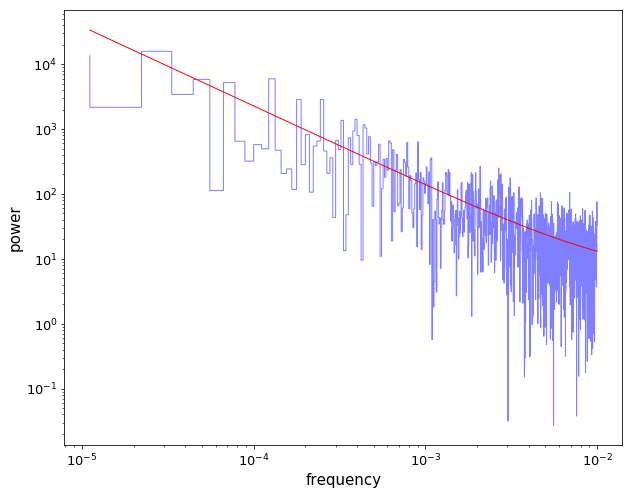

In [7]:
log_A,alpha,log_poisson = n03.values[0],n03.values[1],n03.values[2]

model_nob_03 = []
f_length_03 = len(f_03)
for i in range(f_length_03):
    model_nob_03.append((f_03[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_03, per_03, color="b", alpha=0.5, linewidth=1)
plt.plot(f_03, model_nob_03, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

1.96148529301081


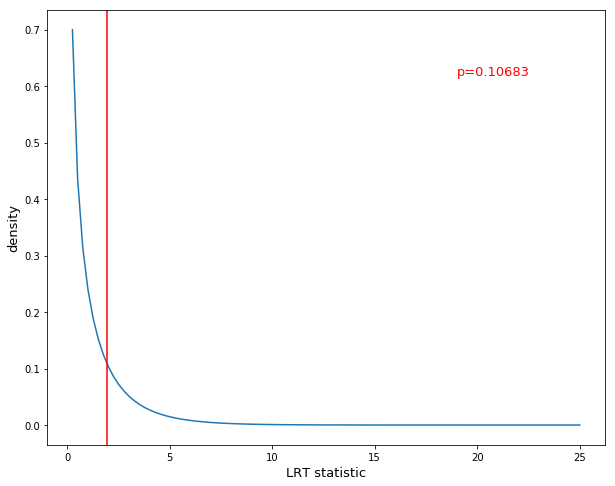

In [8]:
import scipy.stats as stats

# LRT statistic
T = n03.fval-m03.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2014(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_141(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata141 = pd.read_csv("perlist141_s.csv")
    f = perdata141['f']
    per = perdata141['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata141)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m141=Minuit(twi_minus_loglikelihood_141,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,30.0),limit_log_poisson=(0,3),
         errordef=1)
'''
如果不加限制，alpha_H会收敛到负值
但现在得到的较大值 alpha_H 显然也并不具备物理意义（谱太平了）
'''

m141.migrad()

pprint(m141.fval)

FCN = 5697.5574632840035 
 TOTAL NCALL = 658 
 NCALLS = 658 
 
 
 EDM = 3.7910621799030592e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.22323,0.391,,,-5,0,No
1,log_f_b,-4.16107,0.207923,,,-7,-2,No
2,alpha_H,29.9988,26.9118,,,1,30,No
3,log_poisson,1.94673,0.0191251,,,0,3,No


5697.5574632840035


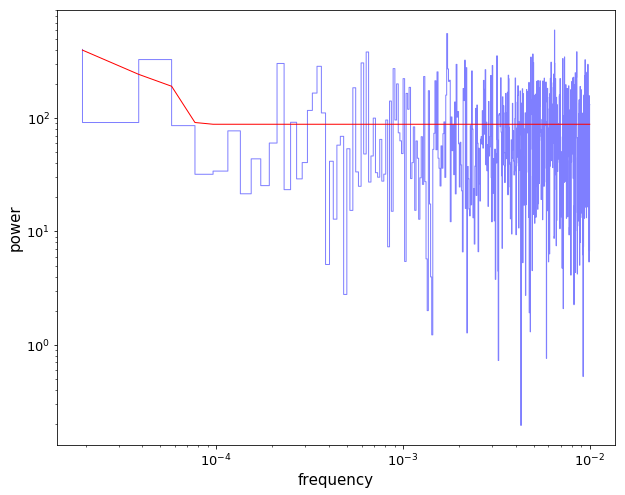

In [11]:
perdata141 = pd.read_csv("perlist141_s.csv")
f_141 = perdata141['f']
per_141 = perdata141['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m141.values[0],m141.values[1],m141.values[2],m141.values[3]

model_141 = []
f_length_141 = len(f_141)
for i in range(f_length_141):
    model_141.append(((f_141[i]**(-alpha_L))/(1+(f_141[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_141, per_141, color="b", alpha=0.5, linewidth=1)
plt.plot(f_141, model_141, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2014(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_141(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata141 = pd.read_csv("perlist141_s.csv")
    f = perdata141['f']
    per = perdata141['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata141)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n141=Minuit(twi_minus_loglikelihood_nobreak_141,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-9,-6),limit_alpha=(1.0,5.0),limit_log_poisson=(0,3),
         errordef=1)

n141.migrad()

pprint(n141.fval)

FCN = 5698.6313572552 
 TOTAL NCALL = 330 
 NCALLS = 330 
 
 
 EDM = 7.979831960714087e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-7.62525,1.88424,,,-9,-6,No
1,alpha,2.1539,1.1686,,,1,5,No
2,log_poisson,1.94737,0.0192173,,,0,3,No


5698.6313572552


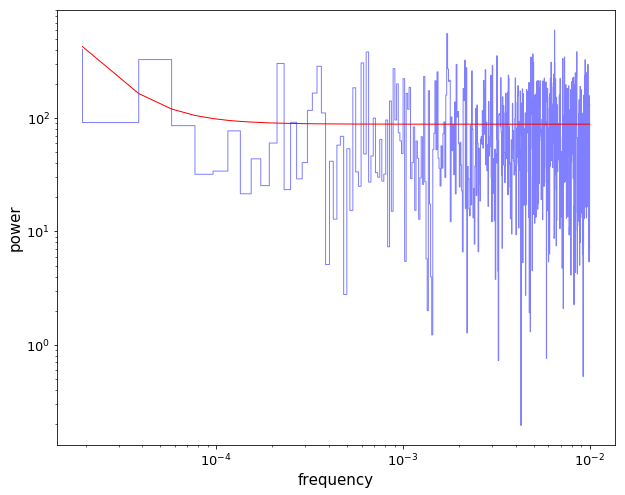

In [14]:
log_A,alpha,log_poisson = n141.values[0],n141.values[1],n141.values[2]

model_nob_141 = []
f_length_141 = len(f_141)
for i in range(f_length_141):
    model_nob_141.append((f_141[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_141, per_141, color="b", alpha=0.5, linewidth=1)
plt.plot(f_141, model_nob_141, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

1.0738939711964122


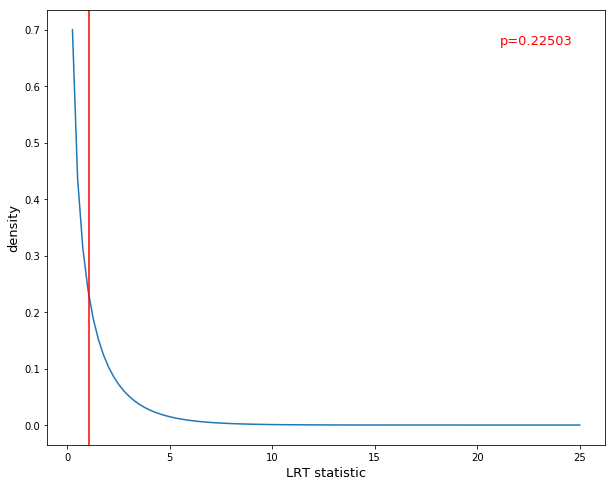

In [15]:
import scipy.stats as stats

# LRT statistic
T = n141.fval-m141.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2019 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_19(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata19 = pd.read_csv("perlist19_s.csv")
    f = perdata19['f']
    per = perdata19['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata19)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m19=Minuit(twi_minus_loglikelihood_19,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,3), limit_log_f_b=(-9,-2),limit_alpha_H=(0,3),limit_log_poisson=(0,3),
         errordef=1)

m19.migrad()

pprint(m19.fval)

FCN = 8465.446732198196 
 TOTAL NCALL = 629 
 NCALLS = 629 
 
 
 EDM = 3.0372666755024808e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.829378,0.0623668,,,-3,3,No
1,log_f_b,-4.49154,0.404835,,,-9,-2,No
2,alpha_H,1.46515e-05,2.72954,,,0,3,No
3,log_poisson,1.74527,0.0401496,,,0,3,No


8465.446732198196


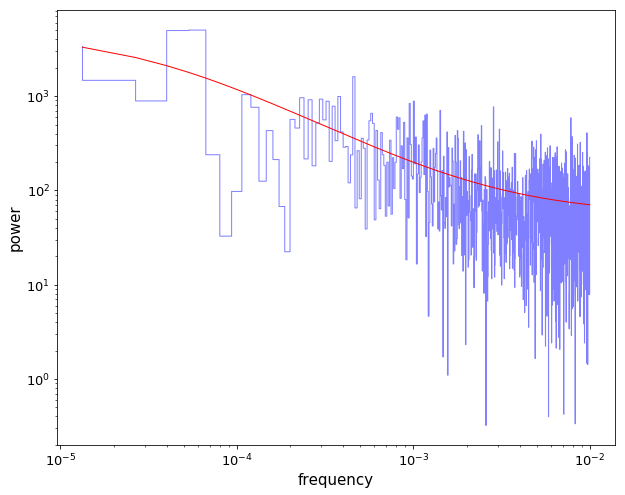

In [18]:
perdata19 = pd.read_csv("perlist19_s.csv")
f_19 = perdata19['f']
per_19 = perdata19['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m19.values[0],m19.values[1],m19.values[2],m19.values[3]

model_19 = []
f_length_19 = len(f_19)
for i in range(f_length_19):
    model_19.append(((f_19[i]**(-alpha_L))/(1+(f_19[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_19, per_19, color="b", alpha=0.5, linewidth=1)
plt.plot(f_19, model_19, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2019 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_19(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata19 = pd.read_csv("perlist19_s.csv")
    f = perdata19['f']
    per = perdata19['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata19)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n19=Minuit(twi_minus_loglikelihood_nobreak_19,log_A=-2,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,3),limit_alpha=(0.0,5.0),limit_log_poisson=(0,3),
         errordef=1)

n19.migrad()

pprint(n19.fval)

FCN = 8466.845507381035 
 TOTAL NCALL = 281 
 NCALLS = 281 
 
 
 EDM = 1.1636015954418985e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.550105,0.470241,,,-3,3,No
1,alpha,0.902665,0.141291,,,0,5,No
2,log_poisson,1.71561,0.0939755,,,0,3,No


8466.845507381035


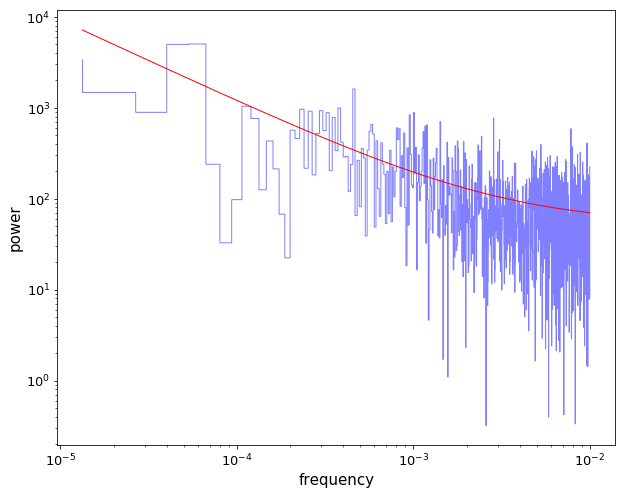

In [21]:
log_A,alpha,log_poisson = n19.values[0],n19.values[1],n19.values[2]

model_nob_19 = []
f_length_19 = len(f_19)
for i in range(f_length_19):
    model_nob_19.append((f_19[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_19, per_19, color="b", alpha=0.5, linewidth=1)
plt.plot(f_19, model_nob_19, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

1.3987751828390174


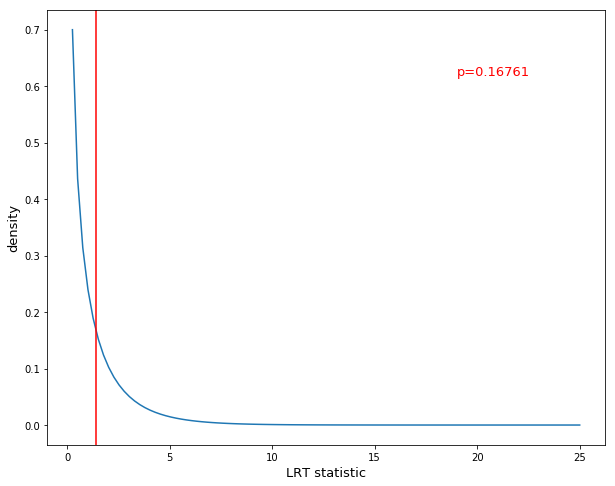

In [22]:
import scipy.stats as stats

# LRT statistic
T = n19.fval-m19.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data03 = pd.read_csv("energy_ngc4395_03.csv")  
x03 = data03['x']
y03 = data03['y']
xerr03 = data03['xerr']
yerr03 = data03['yerr']

data141 = pd.read_csv("energy_ngc4395_141.csv")  
x141 = data141['x']
y141 = data141['y']
xerr141 = data141['xerr']
yerr141 = data141['yerr']

data19 = pd.read_csv("energy_ngc4395_19.csv")  
x19 = data19['x']
y19 = data19['y']
xerr19 = data19['xerr']
yerr19 = data19['yerr']

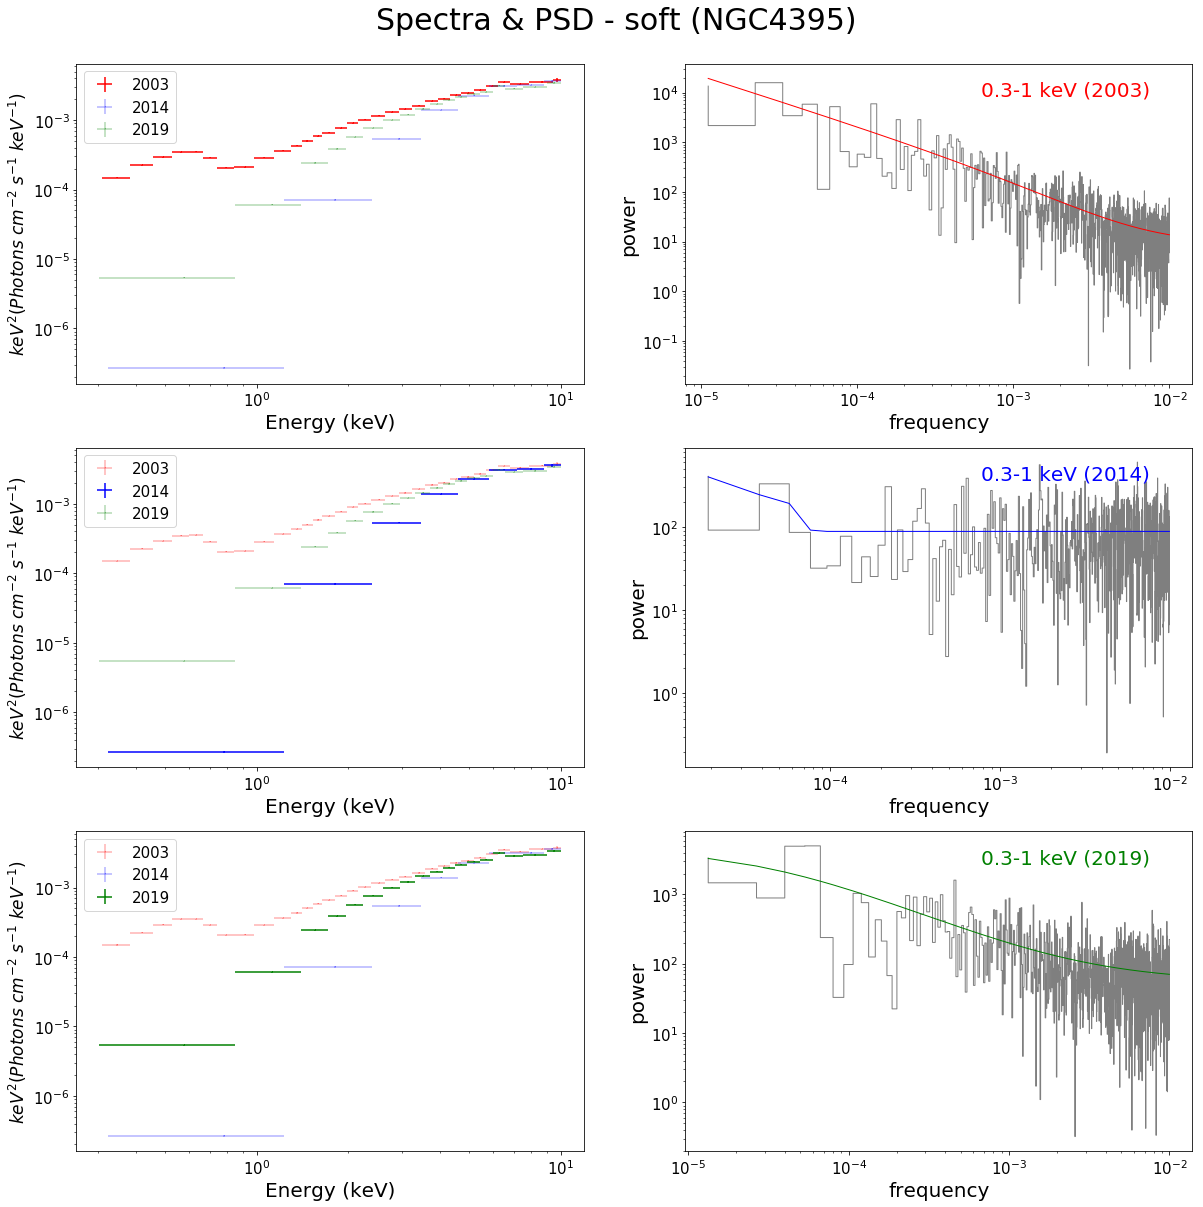

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)


ax1.loglog()
ax1.errorbar(x03, y03, yerr=yerr03, xerr=xerr03, fmt=',r', label='2003')
ax1.errorbar(x141, y141, yerr=yerr141, xerr=xerr141, fmt=',b', alpha=0.3, label='2014')
ax1.errorbar(x19, y19, yerr=yerr19, xerr=xerr19, fmt=',g', alpha=0.3, label='2019')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x03, y03, yerr=yerr03, xerr=xerr03, fmt=',r', alpha=0.3, label='2003')
ax3.errorbar(x141, y141, yerr=yerr141, xerr=xerr141, fmt=',b', label='2014')
ax3.errorbar(x19, y19, yerr=yerr19, xerr=xerr19, fmt=',g', alpha=0.3, label='2019')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x03, y03, yerr=yerr03, xerr=xerr03, fmt=',r', alpha=0.3, label='2003')
ax5.errorbar(x141, y141, yerr=yerr141, xerr=xerr141, fmt=',b', alpha=0.3, label='2014')
ax5.errorbar(x19, y19, yerr=yerr19, xerr=xerr19, fmt=',g', label='2019')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_03, per_03, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_03, model_03, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2003)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_141, per_141, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_141, model_141, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2014)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_19, per_19, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_19, model_19, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"0.3-1 keV (2019)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)


plt.suptitle("Spectra & PSD - soft (NGC4395)", x=0.5, y=0.92, fontsize=30)
plt.show()